In [1]:
# Dependencies
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# Read csv into a dataframe
crime_df = pd.read_csv("Resources/crime_report.csv")
crime_df.head()

,CASE NUMBER,DATE,TIME,CODE,INCIDENT TYPE,INCIDENT,POLICE GRID NUMBER,NEIGHBORHOOD NUMBER,NEIGHBORHOOD NAME,BLOCK,CALL DISPOSITION CODE,CALL DISPOSITION,Count
0,18218701,09/22/2018,23:32:12,9954,Proactive Police Visit,Proactive Police Visit,105.0,13,13 - Union Park,137X STANTHONY AV,A,Advised,1
1,17042545,02/27/2017,6:56,1400,Criminal Damage to Property,Vandalism,71.0,6,6 - North End,13X WINNIPEG AV,A,Advised,1
2,19063393,03/29/2019,2019-03-29T00:14:00.000,2619,"Weapons, Discharging a Firearm in the City Limits",Discharge,98.0,1,1 - Conway/Battlecreek/Highwood,166X MARGARET ST,RR,Report Written,1
3,16260773,12/21/2016,19:29,1410,"Criminal Damage to Property (Misdemeanor, Unde...",Vandalism,70.0,6,6 - North End,84X GALTIER ST,RR,Report Written,1
4,18109307,05/23/2018,6:41:13,9954,Proactive Police Visit,Proactive Police Visit,207.0,9,9 - West Seventh,108X MONTREAL AV,A,Advised,1


In [3]:
# Pull out all rows with nan's just to see
crime_nan = crime_df[crime_df.isna().any(axis=1)]
crime_nan

,CASE NUMBER,DATE,TIME,CODE,INCIDENT TYPE,INCIDENT,POLICE GRID NUMBER,NEIGHBORHOOD NUMBER,NEIGHBORHOOD NAME,BLOCK,CALL DISPOSITION CODE,CALL DISPOSITION,Count
1020,18054879,03/17/2018,8:59:26,9954,Proactive Police Visit,Proactive Police Visit,NaN,3,3 - West Side,LILYDALE RD & WATER,A,Advised,1
2698,18071249,04/08/2018,2:49:00,1835,"Narcotics, Possession of Marijuana",Narcotics,NaN,10,10 - Como,DALE ST N & IOWA,RR,Report Written,1
6431,18008414,01/13/2018,5:27:01,9954,Proactive Police Visit,Proactive Police Visit,NaN,5,5 - Payne/Phalen,60X LAFAYETTE RD S,A,Advised,1
10170,18224827,09/30/2018,00:50:09,9954,Proactive Police Visit,Proactive Police Visit,NaN,5,5 - Payne/Phalen,50X LAFAYETTE RD,A,Advised,1
11561,18025800,02/06/2018,9:39:30,9954,Proactive Police Visit,Proactive Police Visit,NaN,3,3 - West Side,170X LILYDALE ST,A,Advised,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
204468,18021099,01/30/2018,22:43:00,9954,Proactive Police Visit,Proactive Police Visit,NaN,17,17 - Capitol River,11X 10 ST E,A,Advised,1
204819,18043425,03/01/2018,22:49:58,9954,Proactive Police Visit,Proactive Police Visit,NaN,12,12 - St. Anthony,55X VANDALIA ST,A,Advised,1
207374,17284027,12/10/2017,9:36:00,9954,Proactive Police Visit,Proactive Police Visit,NaN,3,3 - West Side,LILYDALE ST & LILYDALE,A,Advised,1
208404,18039309,02/24/2018,10:15:23,9954,Proactive Police Visit,Proactive Police Visit,NaN,3,3 - West Side,170X LILYDALE ST,A,Advised,1


In [4]:
# Another way to look for missing values
crime_df.count()

CASE NUMBER              253709
DATE                     253709
TIME                     253706
CODE                     253709
INCIDENT TYPE            253709
INCIDENT                 253709
POLICE GRID NUMBER       253619
NEIGHBORHOOD NUMBER      253709
NEIGHBORHOOD NAME        251518
BLOCK                    253705
CALL DISPOSITION CODE    253709
CALL DISPOSITION         253709
Count                    253709
dtype: int64

In [5]:
# Drop null rows
no_null_crime_df = crime_df.dropna(how='any')

In [6]:
 # Verify counts
no_null_crime_df.count()

CASE NUMBER              251421
DATE                     251421
TIME                     251421
CODE                     251421
INCIDENT TYPE            251421
INCIDENT                 251421
POLICE GRID NUMBER       251421
NEIGHBORHOOD NUMBER      251421
NEIGHBORHOOD NAME        251421
BLOCK                    251421
CALL DISPOSITION CODE    251421
CALL DISPOSITION         251421
Count                    251421
dtype: int64

In [7]:
# Look at types of Call Disposition
no_null_crime_df["CALL DISPOSITION CODE"].unique()

array(['A', 'RR', 'G', 'R'], dtype=object)

In [8]:
# Combine 'RR' and 'R' because they both stand for Report Written from what I can tell from the official dataset
no_null_crime_df = no_null_crime_df.replace({'R': 'RR'})

# Check unique codes again
no_null_crime_df["CALL DISPOSITION CODE"].unique()

array(['A', 'RR', 'G'], dtype=object)

In [9]:
# Look at 'INCIDENT TYPE' and 'INCIDENT' to see if there are similar values
no_null_crime_df["INCIDENT TYPE"].value_counts()

Proactive Police Visit                               109270
Theft, Except Auto Theft                              17070
Motor Vehicle Theft, Automobile                        9865
Narcotics                                              9307
Criminal Damage to Property                            8770
                                                      ...  
Graffiti-Gang (Felony, Over $500)                         1
Arson, Residential, Multiple, Abandoned, Other            1
Theft-Mail/Package                                        1
Robbery, Service Station, Other Dangerous Weapons         1
Theft, From Coin Operated Device, Over $1000              1
Name: INCIDENT TYPE, Length: 175, dtype: int64

In [10]:
# INCIDENT
no_null_crime_df["INCIDENT"].value_counts()

Proactive Police Visit        109270
Theft                          54312
Vandalism                      16675
Auto Theft                     14634
Narcotics                      13950
Burglary                       12735
Simple Asasult Dom.             6541
Community Engagement Event      6037
Discharge                       5887
Robbery                         3894
Agg. Assault                    2591
Agg. Assault Dom.               2416
Graffiti                         992
Rape                             873
Arson                            572
Homicide                          24
Simple Assault Dom.               16
Other                              2
Name: INCIDENT, dtype: int64

In [11]:
# Combine 'Simple Assault Dom.' (one is misspelled)
no_null_crime_df = no_null_crime_df.replace(
                            {"Simple Asasult Dom.": "Simple Assault Dom."})

# Check value counts again
no_null_crime_df["INCIDENT"].value_counts()

Proactive Police Visit        109270
Theft                          54312
Vandalism                      16675
Auto Theft                     14634
Narcotics                      13950
Burglary                       12735
Simple Assault Dom.             6557
Community Engagement Event      6037
Discharge                       5887
Robbery                         3894
Agg. Assault                    2591
Agg. Assault Dom.               2416
Graffiti                         992
Rape                             873
Arson                            572
Homicide                          24
Other                              2
Name: INCIDENT, dtype: int64

In [12]:
# Use this code if I want to keep both date and time under 'TIME' column
# NOTE: Tableau, this formatting works
# Tableau code: Right-click the field, then Default Properties\Date Format. 
# Then click Custom and paste this into the blank: h:mm:ss AMPM

ser = no_null_crime_df['TIME']
time = pd.to_datetime(ser)
time

0        2020-06-11 23:32:12
1        2020-06-11 06:56:00
2        2019-03-29 00:14:00
3        2020-06-11 19:29:00
4        2020-06-11 06:41:13
                 ...        
253704   2020-05-19 00:44:03
253705   2020-05-17 12:15:00
253706   2020-05-20 14:00:00
253707   2020-05-18 23:33:00
253708   2020-05-19 08:12:00
Name: TIME, Length: 251421, dtype: datetime64[ns]

In [13]:
# This code will just give me the timestamp
# NOTE: This code also works in Tableau
ser = no_null_crime_df['TIME']
time = pd.to_datetime(ser).dt.time
time

0         23:32:12
1         06:56:00
2         00:14:00
3         19:29:00
4         06:41:13
            ...   
253704    00:44:03
253705    12:15:00
253706    14:00:00
253707    23:33:00
253708    08:12:00
Name: TIME, Length: 251421, dtype: object

In [14]:
# Insert new column ('NEW TIME') into dataframe to replace 'TIME' column
no_null_crime_df.insert(2, 'NEW TIME', time)
no_null_crime_df

,CASE NUMBER,DATE,NEW TIME,TIME,CODE,INCIDENT TYPE,INCIDENT,POLICE GRID NUMBER,NEIGHBORHOOD NUMBER,NEIGHBORHOOD NAME,BLOCK,CALL DISPOSITION CODE,CALL DISPOSITION,Count
0,18218701,09/22/2018,23:32:12,23:32:12,9954,Proactive Police Visit,Proactive Police Visit,105.0,13,13 - Union Park,137X STANTHONY AV,A,Advised,1
1,17042545,02/27/2017,06:56:00,6:56,1400,Criminal Damage to Property,Vandalism,71.0,6,6 - North End,13X WINNIPEG AV,A,Advised,1
2,19063393,03/29/2019,00:14:00,2019-03-29T00:14:00.000,2619,"Weapons, Discharging a Firearm in the City Limits",Discharge,98.0,1,1 - Conway/Battlecreek/Highwood,166X MARGARET ST,RR,Report Written,1
3,16260773,12/21/2016,19:29:00,19:29,1410,"Criminal Damage to Property (Misdemeanor, Unde...",Vandalism,70.0,6,6 - North End,84X GALTIER ST,RR,Report Written,1
4,18109307,05/23/2018,06:41:13,6:41:13,9954,Proactive Police Visit,Proactive Police Visit,207.0,9,9 - West Seventh,108X MONTREAL AV,A,Advised,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253704,20093597,05/19/2020,00:44:03,2020-05-19T00:44:03.000,600,"Theft, Except Auto Theft",Theft,153.0,17,17 - Capitol River,34X JACKSON ST,G,Gone on Arrival,1
253705,20802568,05/17/2020,12:15:00,2020-05-17T12:15:00.000,641,"Theft, From Auto, Under $500",Theft,153.0,17,17 - Capitol River,11X KELLOGG BD E,RR,Report Written,1
253706,20094807,05/20/2020,14:00:00,2020-05-20T14:00:00.000,622,"Theft, Purse Snatching, $501 to $1000",Theft,153.0,17,17 - Capitol River,5 ST E & MINNESOTA,RR,Report Written,1
253707,20093563,05/18/2020,23:33:00,2020-05-18T23:33:00.000,2619,"Weapons, Discharging a Firearm in the City Limits",Discharge,153.0,17,17 - Capitol River,5 ST E & CEDAR,RR,Report Written,1


In [15]:
# Drop old 'TIME' column
no_null_crime_df = no_null_crime_df.drop(['TIME'], axis = 1)
no_null_crime_df.head()

,CASE NUMBER,DATE,NEW TIME,CODE,INCIDENT TYPE,INCIDENT,POLICE GRID NUMBER,NEIGHBORHOOD NUMBER,NEIGHBORHOOD NAME,BLOCK,CALL DISPOSITION CODE,CALL DISPOSITION,Count
0,18218701,09/22/2018,23:32:12,9954,Proactive Police Visit,Proactive Police Visit,105.0,13,13 - Union Park,137X STANTHONY AV,A,Advised,1
1,17042545,02/27/2017,06:56:00,1400,Criminal Damage to Property,Vandalism,71.0,6,6 - North End,13X WINNIPEG AV,A,Advised,1
2,19063393,03/29/2019,00:14:00,2619,"Weapons, Discharging a Firearm in the City Limits",Discharge,98.0,1,1 - Conway/Battlecreek/Highwood,166X MARGARET ST,RR,Report Written,1
3,16260773,12/21/2016,19:29:00,1410,"Criminal Damage to Property (Misdemeanor, Unde...",Vandalism,70.0,6,6 - North End,84X GALTIER ST,RR,Report Written,1
4,18109307,05/23/2018,06:41:13,9954,Proactive Police Visit,Proactive Police Visit,207.0,9,9 - West Seventh,108X MONTREAL AV,A,Advised,1


In [16]:
# Save to CSV and explore in Tableau
no_null_crime_df.to_csv("Resources/cleaned_cities.csv", encoding="utf-8")

In [17]:
no_null_crime_df.dtypes

CASE NUMBER                int64
DATE                      object
NEW TIME                  object
CODE                       int64
INCIDENT TYPE             object
INCIDENT                  object
POLICE GRID NUMBER       float64
NEIGHBORHOOD NUMBER        int64
NEIGHBORHOOD NAME         object
BLOCK                     object
CALL DISPOSITION CODE     object
CALL DISPOSITION          object
Count                      int64
dtype: object

## Trend Lines by Incident Over Full Time Span

In [18]:
no_null_crime_df.head()

,CASE NUMBER,DATE,NEW TIME,CODE,INCIDENT TYPE,INCIDENT,POLICE GRID NUMBER,NEIGHBORHOOD NUMBER,NEIGHBORHOOD NAME,BLOCK,CALL DISPOSITION CODE,CALL DISPOSITION,Count
0,18218701,09/22/2018,23:32:12,9954,Proactive Police Visit,Proactive Police Visit,105.0,13,13 - Union Park,137X STANTHONY AV,A,Advised,1
1,17042545,02/27/2017,06:56:00,1400,Criminal Damage to Property,Vandalism,71.0,6,6 - North End,13X WINNIPEG AV,A,Advised,1
2,19063393,03/29/2019,00:14:00,2619,"Weapons, Discharging a Firearm in the City Limits",Discharge,98.0,1,1 - Conway/Battlecreek/Highwood,166X MARGARET ST,RR,Report Written,1
3,16260773,12/21/2016,19:29:00,1410,"Criminal Damage to Property (Misdemeanor, Unde...",Vandalism,70.0,6,6 - North End,84X GALTIER ST,RR,Report Written,1
4,18109307,05/23/2018,06:41:13,9954,Proactive Police Visit,Proactive Police Visit,207.0,9,9 - West Seventh,108X MONTREAL AV,A,Advised,1


In [19]:
# Want to graph by year, so pull year out of Date and create new column

no_null_crime_df["YEAR"] = pd.DatetimeIndex(no_null_crime_df["DATE"]).year

# Preview to make sure it worked
no_null_crime_df.head()

,CASE NUMBER,DATE,NEW TIME,CODE,INCIDENT TYPE,INCIDENT,POLICE GRID NUMBER,NEIGHBORHOOD NUMBER,NEIGHBORHOOD NAME,BLOCK,CALL DISPOSITION CODE,CALL DISPOSITION,Count,YEAR
0,18218701,09/22/2018,23:32:12,9954,Proactive Police Visit,Proactive Police Visit,105.0,13,13 - Union Park,137X STANTHONY AV,A,Advised,1,2018
1,17042545,02/27/2017,06:56:00,1400,Criminal Damage to Property,Vandalism,71.0,6,6 - North End,13X WINNIPEG AV,A,Advised,1,2017
2,19063393,03/29/2019,00:14:00,2619,"Weapons, Discharging a Firearm in the City Limits",Discharge,98.0,1,1 - Conway/Battlecreek/Highwood,166X MARGARET ST,RR,Report Written,1,2019
3,16260773,12/21/2016,19:29:00,1410,"Criminal Damage to Property (Misdemeanor, Unde...",Vandalism,70.0,6,6 - North End,84X GALTIER ST,RR,Report Written,1,2016
4,18109307,05/23/2018,06:41:13,9954,Proactive Police Visit,Proactive Police Visit,207.0,9,9 - West Seventh,108X MONTREAL AV,A,Advised,1,2018


In [29]:
# Group the dataframe by Year and Incident
grouped_df = no_null_crime_df.groupby(["YEAR", "INCIDENT"])
Incident_Total = grouped_df["INCIDENT"].count()

# Create dataframe
Incident_Total_df = pd.DataFrame(Incident_Total)
# Preview
Incident_Total_df

INCIDENT
YEAR INCIDENT                     
2014 Agg. Assault              198
     Agg. Assault Dom.         187
     Arson                      45
     Auto Theft               1125
     Burglary                 1156
...                            ...
2020 Rape                       52
     Robbery                   222
     Simple Assault Dom.       486
     Theft                    3444
     Vandalism                1106

[108 rows x 1 columns]

In [30]:
# Reset the index and rename the column
Incident_Total_df = Incident_Total_df.rename(columns={"INCIDENT": "Count"}).reset_index()
# Preview
Incident_Total_df

,YEAR,INCIDENT,Count
0,2014,Agg. Assault,198
1,2014,Agg. Assault Dom.,187
2,2014,Arson,45
3,2014,Auto Theft,1125
4,2014,Burglary,1156
...,...,...,...
103,2020,Rape,52
104,2020,Robbery,222
105,2020,Simple Assault Dom.,486
106,2020,Theft,3444


In [27]:
# Reset the index and rename the column
Incident_Total_df = Incident_Total_df.set_index("YEAR")
# Preview
Incident_Total_df

,INCIDENT,Count
YEAR,,
2014,Agg. Assault,198
2014,Agg. Assault Dom.,187
2014,Arson,45
2014,Auto Theft,1125
2014,Burglary,1156
...,...,...
2020,Rape,52
2020,Robbery,222
2020,Simple Assault Dom.,486


In [31]:
# Pivot the dataframe for graphing purposes
pivot_df = Incident_Total_df.pivot(index = "YEAR", 
                                   columns = "INCIDENT",
                                   values = "Count")
pivot_df

INCIDENT,Agg. Assault,Agg. Assault Dom.,Arson,Auto Theft,Burglary,Community Engagement Event,Discharge,Graffiti,Homicide,Narcotics,Other,Proactive Police Visit,Rape,Robbery,Simple Assault Dom.,Theft,Vandalism
YEAR,,,,,,,,,,,,,,,,,
2014,198.0,187.0,45.0,1125.0,1156.0,NaN,289.0,91.0,1.0,975.0,NaN,NaN,53.0,338.0,401.0,4181.0,1258.0
2015,501.0,446.0,97.0,2150.0,2357.0,NaN,816.0,193.0,3.0,2663.0,NaN,NaN,145.0,784.0,1124.0,9849.0,2944.0
2016,485.0,413.0,88.0,2482.0,2530.0,62.0,1145.0,232.0,2.0,2490.0,NaN,1870.0,142.0,782.0,1022.0,9583.0,3193.0
2017,393.0,371.0,103.0,2137.0,2044.0,1909.0,1181.0,151.0,6.0,2149.0,NaN,29827.0,141.0,654.0,977.0,8796.0,2596.0
2018,461.0,495.0,78.0,2734.0,1955.0,1915.0,1022.0,145.0,4.0,2614.0,2.0,30313.0,186.0,593.0,1329.0,9234.0,2816.0
2019,394.0,349.0,96.0,2790.0,1997.0,1750.0,956.0,130.0,8.0,2290.0,NaN,32574.0,154.0,521.0,1218.0,9225.0,2762.0
2020,159.0,155.0,65.0,1216.0,696.0,401.0,478.0,50.0,NaN,769.0,NaN,14686.0,52.0,222.0,486.0,3444.0,1106.0


In [53]:
incidents_df = pivot_df[["Agg. Assault", "Agg. Assault Dom.", "Arson","Auto Theft", "Burglary",
                         "Discharge", "Graffiti", "Homicide", "Narcotics", "Rape", "Robbery",
                         "Simple Assault Dom.", "Theft", "Vandalism"]]
incidents_df

INCIDENT,Agg. Assault,Agg. Assault Dom.,Arson,Auto Theft,Burglary,Discharge,Graffiti,Homicide,Narcotics,Rape,Robbery,Simple Assault Dom.,Theft,Vandalism
YEAR,,,,,,,,,,,,,,
2014,198.0,187.0,45.0,1125.0,1156.0,289.0,91.0,1.0,975.0,53.0,338.0,401.0,4181.0,1258.0
2015,501.0,446.0,97.0,2150.0,2357.0,816.0,193.0,3.0,2663.0,145.0,784.0,1124.0,9849.0,2944.0
2016,485.0,413.0,88.0,2482.0,2530.0,1145.0,232.0,2.0,2490.0,142.0,782.0,1022.0,9583.0,3193.0
2017,393.0,371.0,103.0,2137.0,2044.0,1181.0,151.0,6.0,2149.0,141.0,654.0,977.0,8796.0,2596.0
2018,461.0,495.0,78.0,2734.0,1955.0,1022.0,145.0,4.0,2614.0,186.0,593.0,1329.0,9234.0,2816.0
2019,394.0,349.0,96.0,2790.0,1997.0,956.0,130.0,8.0,2290.0,154.0,521.0,1218.0,9225.0,2762.0
2020,159.0,155.0,65.0,1216.0,696.0,478.0,50.0,NaN,769.0,52.0,222.0,486.0,3444.0,1106.0


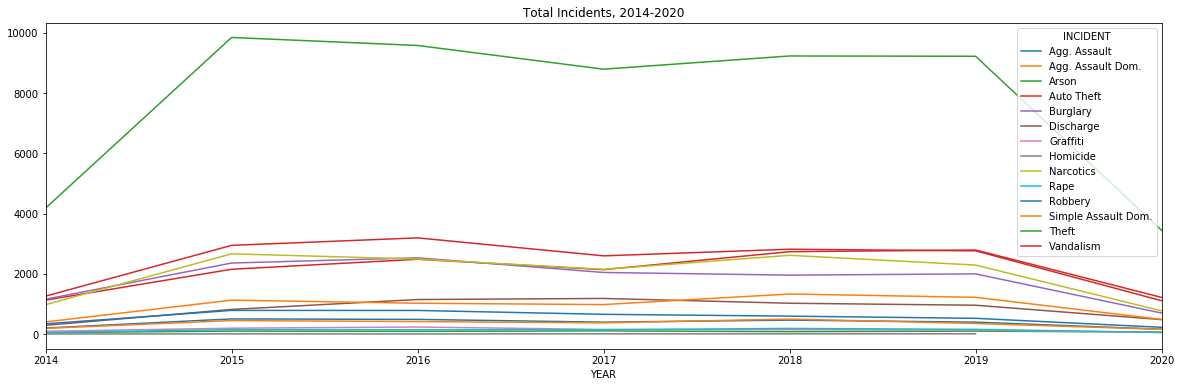

<Figure size 432x288 with 0 Axes>

In [54]:
incidents_df.plot(kind="line", figsize=(20,6))
# Set a title for the chart
plt.title("Total Incidents, 2014-2020")

plt.show()
plt.tight_layout()